In [5]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントとmecabをインストール
system("apt-get install -y fonts-ipafont mecab libmecab-dev mecab-ipadic mecab-ipadic-utf8")
# フォント一覧を表示
# systemfonts::system_fonts()
install.packages("RMeCab", repos="http://rmecab.jp/R/")
library(RMeCab)
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(RMeCab)
# [1]
getMorph <- function(fn, pos) {
  dat <- docDF(fn, type = 1, pos = pos)
  names(dat)[4] <- "FREQ" # 列名の4番目を"FREQ"に変更
  ne <- grep("[[:punct:]]+", dat$TERM)      # dat$TERM中のパンクチュエーションの位置（行番号）
  dat <- dat[-ne,]      # neの行削除　※neが空（要素数0）だとエラーになるので注意

  # (4) アルファベット1文字削除
  ne <- grep("^([[:upper:]]|[[:lower:]])$", dat$TERM)
  if(length(ne)!=0)dat <- dat[-ne,]
  # (2,3,5) 数・接尾・非自立を削除
  ne <- which(dat$POS2 %in% c("数", "非自立", "接尾"))
  dat <- dat[-ne,]
  return(dat)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘BH’, ‘Rcpp’, ‘tm’, ‘slam’


Loading required package: RColorBrewer



file_name =  /content/32140.txt opened
number of extracted terms = 205
now making a data frame. wait a while!



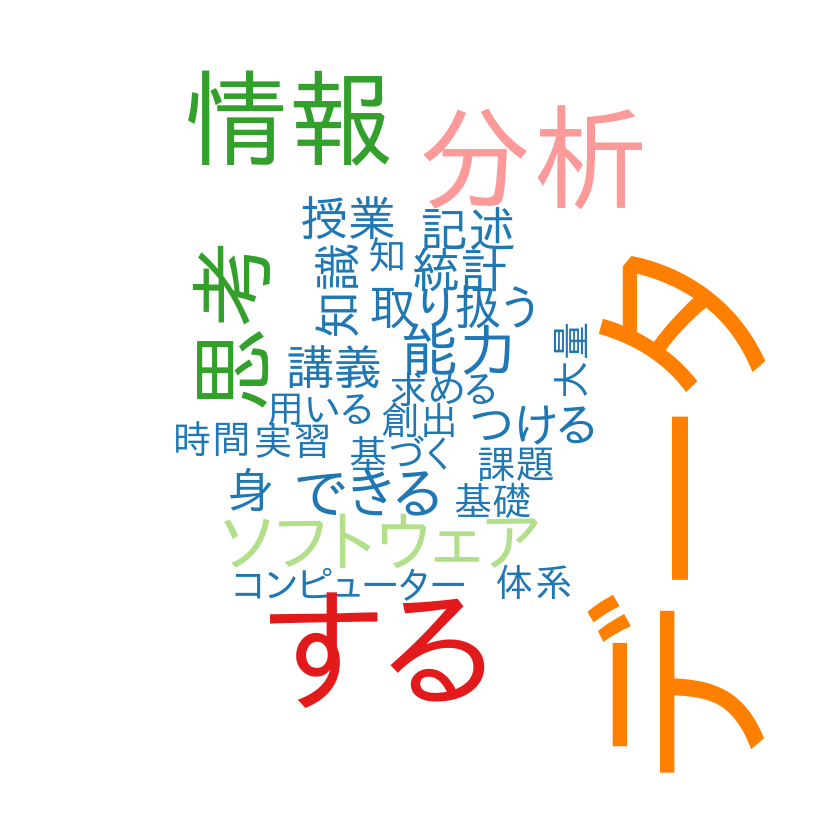

In [4]:
# [2] 基礎演習S
install.packages(c("wordcloud"), dependencies=TRUE)
library('wordcloud')
dat<-getMorph("/content/32140.txt", c("名詞","形容詞","動詞"))
wordcloud(dat$TERM, dat$FREQ, min.freq = 3, scale = c(10, .5), colors = brewer.pal(8, "Paired"))

###Sの気づき
データや分析、情報などの頻度が多いことからSコースの印象を感じる。

file_name =  /content/32142.txt opened
number of extracted terms = 256
now making a data frame. wait a while!



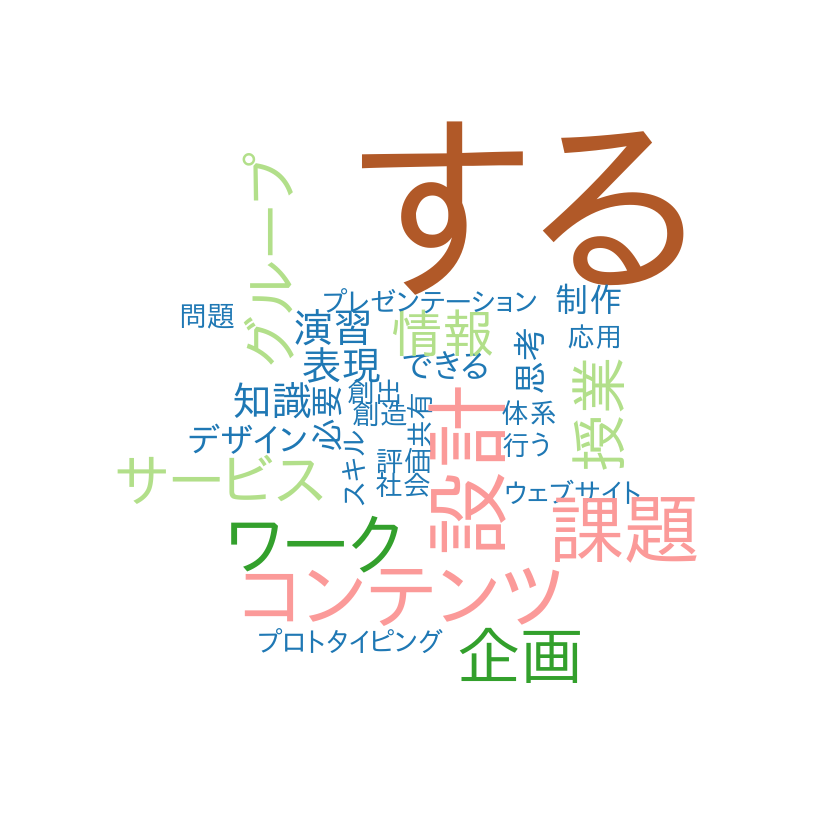

In [7]:
# 基礎演習D
dat<-getMorph("/content/32142.txt", c("名詞","形容詞","動詞"))
wordcloud(dat$TERM, dat$FREQ, min.freq = 3, scale = c(10, .5), colors = brewer.pal(12, "Paired"))

###Dの気づき
設計やコンテンツ企画などの頻度が高いことが読み取れるためグループで企画したり何か創出したりすることが想像できる。

file_name =  /content/32558.txt opened
number of extracted terms = 172
now making a data frame. wait a while!



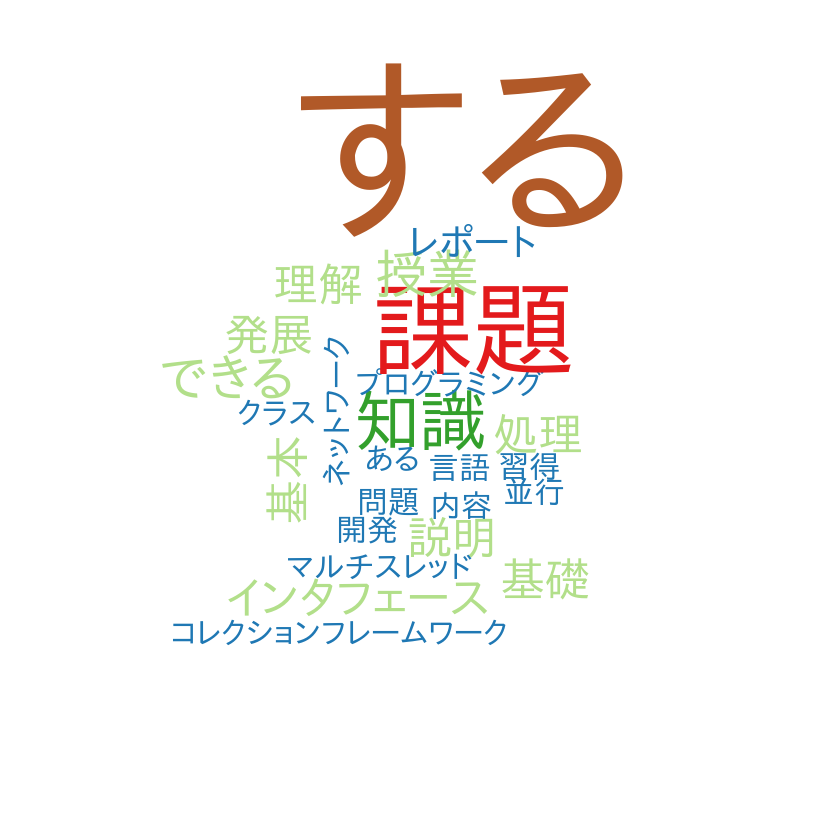

In [8]:
# 基礎演習DS
dat<-getMorph("/content/32558.txt", c("名詞","形容詞","動詞"))
###下の関数barMorphのテスト###
# id <- order(dat$FREQ, decreasing=TRUE)    # datの頻度の列を降順に並び替え、行番号を返すz
# head(id)
# h <- dat[id[1:10], 4]
# h
# noun <- dat[id[1:10], 1]	
# noun
# head(dat)
######################
wordcloud(dat$TERM, dat$FREQ, min.freq = 3, scale = c(10, .5), colors = brewer.pal(12, "Paired"))

###DSの気づき
理解や説明できる、知識というキーワードが多いことに気づいた

file_name =  /content/32140.txt opened
number of extracted terms = 178
now making a data frame. wait a while!

file_name =  /content/32142.txt opened
number of extracted terms = 223
now making a data frame. wait a while!



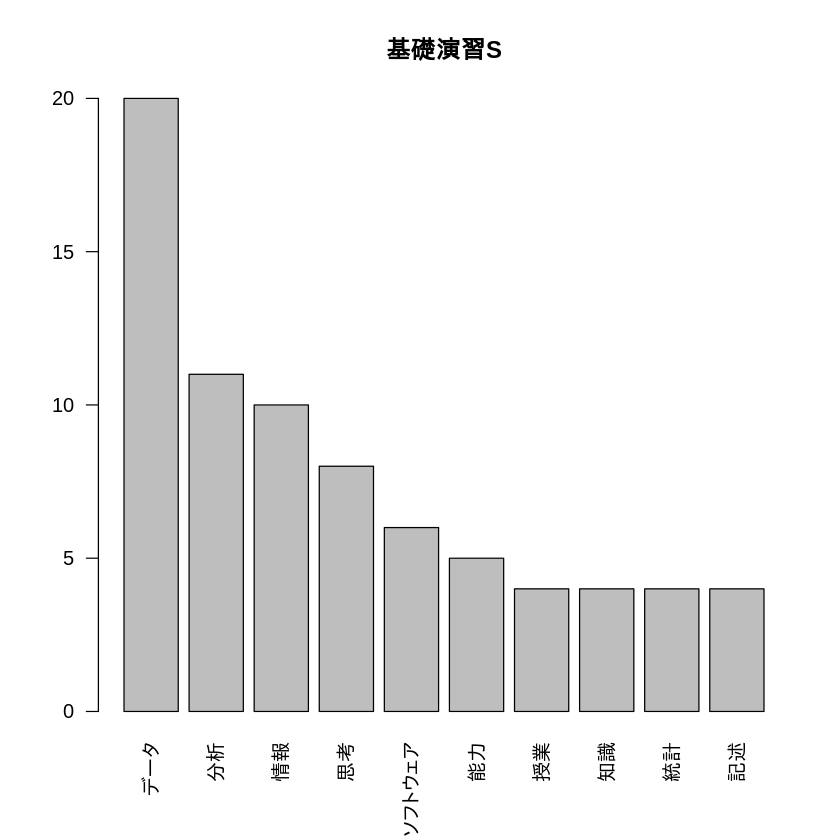

file_name =  /content/32558.txt opened
number of extracted terms = 150
now making a data frame. wait a while!



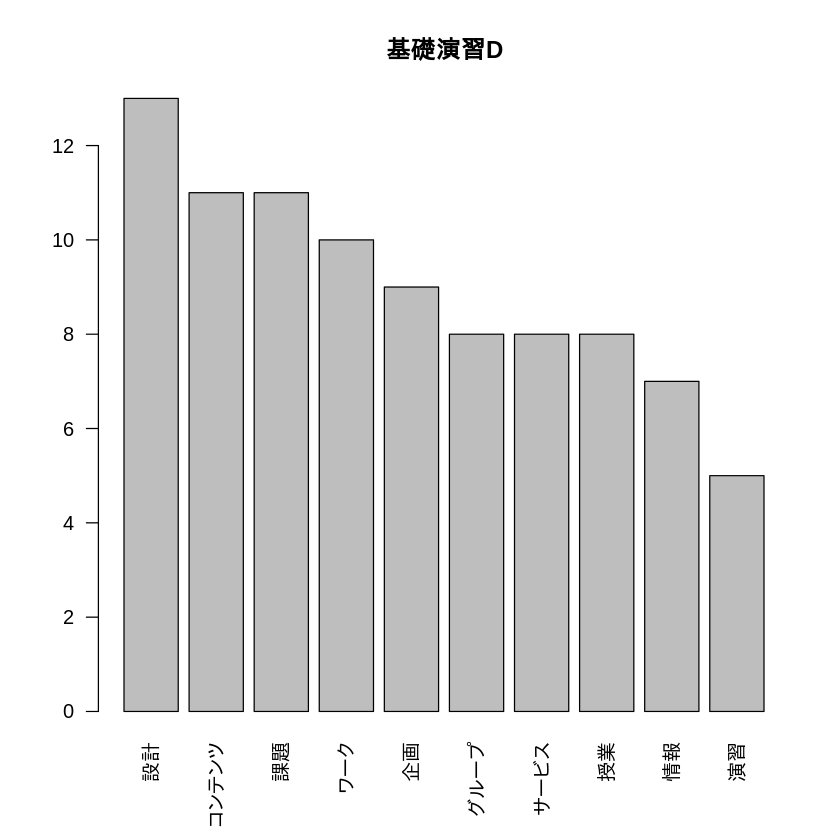

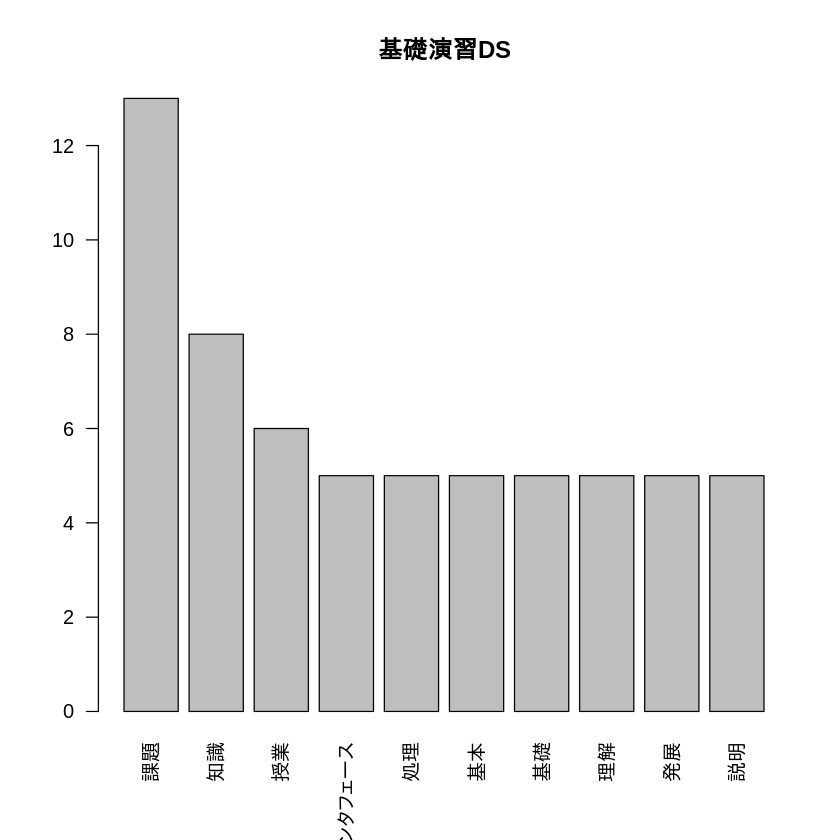

In [9]:
# [3]
barMorph <- function(fn, pos, sn, n) {		# 関数barMorphを定義する
  dat <- getMorph(fn, pos)			# 関数getMorphをdatに代入する
  id <- order(dat$FREQ, decreasing=TRUE)    # datのFREQの列を抽出し、降順に並び替えた行番号の値を代入する
  h <- dat[id[1:n], 4]			# idの値の行、4列目を代入する
  noun <- dat[id[1:n], 1]			# idの値の行、1行目を代入する
  #par(mar=c(7,3,3,2))
  barplot(h, names.arg=noun, las=2, main=sn)	# y軸=h。x軸=noun。グラフタイトル=sn
}

# 基礎演習S，インタラクションデザイン（基礎演習D），ソフトウェア開発（SD基礎演習）のW.Cloud
fns <- c("/content/32140.txt","/content/32142.txt","/content/32558.txt")				# 3教科のファイル名ベクトル
pos <- c("名詞")				# 文字列を代入
sns <- c("基礎演習S", "基礎演習D", "基礎演習DS")	# 文字列を代入
n <- 10					# 数値を代入
for(i in 1:3) barMorph(fns[i], pos, sns[i], n)	# 3回関数を繰り返す